In [518]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#target area: x=20..30, y=-10..-5
# x=277..318, y=-92..-53
318 - 277

41

In [589]:
x_range = np.array([277, 319])
y_range = np.array([-92, -52])

max_x_velocity = x_range[1] 


### Part One

In [590]:
max_y = np.max(y_range * (y_range + 1) // 2) # assumes negative y (otherwise min)
print("Problem 1:", max_y)

Problem 1: 4186


In [611]:
from itertools import product

def in_box(x, y, x_range, y_range):
    return x in x_range and y in y_range

def simulate(v, x_min, x_max, y_min, y_max):
    vel_x, vel_y = v
    x = 0 
    y = 0
    
    while abs(x) <= x_max and y >= y_min:
        if x in range(x_min, x_max+1) and y in range(y_min, y_max+1):
            return 1
        x += vel_x
        y += vel_y
        vel_x -= 0 if vel_x == 0 else (-1 if vel_x < 0 else 1)
        vel_y -= 1
    return 0

def run_sim(x_range, y_range):
    x_min, x_max = x_range
    y_min, y_max = y_range

    points = product(range(x_max + 1), range(y_min, abs(y_max) * 2 +1))

    return sum(simulate(p, x_min, x_max, y_min, y_max) for p in points)
    
x_range = (277, 318)
y_range = (-92, -53)

res = run_sim(x_range,y_range)
print("Problem 2: ", res)


Problem 2:  2709


### Don't do it this way!

Well that was fun, but it didn't work and it's hard and it's complex
...need to figure out how to account for x motion as velocity approaches 0

number of possible starting x velocities: 156


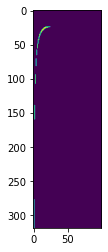

In [567]:

def position_x(t, v):
    '''Position a time t given velocity v'''
    # dt/dv--don't include results that change direction-- but how?
    s = v - t >= 0
    return s*(v * t + (t * (1-t)/2)).astype(int)

def in_xrange(x, xrange):
    return np.logical_and((xrange[0] <= x), (x <= xrange[1]))

def in_yrange(x, xrange):
    return np.logical_and((xrange[0] <= x), (x <= xrange[1]))

def velocity(t, pos):
    return t*(1-t)/(-2 * t) + pos/t
    
#all possible x velocities
x_velocities = np.arange(max_x_velocity).reshape(-1, 1) 

# times - more than needed
times = np.arange(100)

# grid of velocity on axis 0, time on axis 1
ps = position_x(times, x_velocities)

# Boolean indicating whether this velocity appears in 
# the box
x_sucess = in_xrange(ps, x_range)

print("number of possible starting x velocities:", np.count_nonzero(x_sucess))

plt.imshow(x_sucess)


In [568]:
# pairs of successful x [x velocity, time]
x_success = np.argwhere(x_sucess.T)

def vel_y(t, pos):
    return pos/t - (1-t)/2


y_positions = np.arange(y_range[0], y_range[1]+1).reshape(-1, 1)
times = x_success[:,0]

vel_floats = vel_y(times, y_positions)
vel_ints = vel_floats.astype(int)
ans = vel_floats[np.isclose(vel_floats, vel_ints)]

len(ans)

2692